# Results

You will find in this notebook the code to be executed to obtain the results in section IV of our report.

In [1]:
import library_data as data 
import library_plot as plot
import library_stats as stats
import library_stylized_facts as sf
import library_te as te 
import library_lead_lag_analysis as llr
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## A. In-Depth Analysis of Bitcoin

### Get daily and intraday data

In [ ]:
start = "2018-12-31"
btc_daily = data.get_daily("BTC-USD", start)

path_file = "data/raw/intraday_historical/BTC_intraday.csv"
btc_intraday = data.get_btc_intraday(path_file)

btc_daily, btc_intraday = data.intersection_timeframes(btc_daily, btc_intraday)

### Comparison of daily and intraday data

In [ ]:
plot.compare_daily_intraday("Close", btc_daily, btc_intraday)
plot.compare_daily_intraday("Volume", btc_daily, btc_intraday)

### Bitcoin’s analysis

In [ ]:
plot.annotated_btc(btc_daily)

### Comparison with traditional financial markets

In [ ]:
stats.compare_btc_sp500_aapl(btc_daily)

In [ ]:
gspc_daily = data.get_daily("^GSPC", start)
plot.annotated_btc_sp500(btc_daily, gspc_daily)

## B. Stylized facts on Price Movements

### Get intraday data

In [ ]:
cryptos = ['btc', 'ltc', 'ada', 'eth']

path_btc = "data/raw/intraday_historical/BTC_intraday.csv"
path_ltc = "data/raw/intraday_historical/LTC_intraday"
path_ada = "data/raw/intraday_historical/ADA_intraday"
path_eth = "data/raw/intraday_historical/ETH_intraday"

# Load data
df_btc = data.get_btc_intraday(path_btc)
df_ada = pd.read_parquet(path_ada)
df_ltc = pd.read_parquet(path_ltc)
df_eth = pd.read_parquet(path_eth)

#Select right timeframe for BTC 
start_date = datetime(2021, 1, 1)
end_date = datetime(2022, 1, 1)
df_btc = data.filter_timeframes(start_date, end_date, df_btc)

### Heavy-tailed distribution of logreturns

In [ ]:
#Convert to logreturns 
for crypto in cryptos:
    locals()[f'df_{crypto}'] = sf.logreturns(locals()[f'df_{crypto}'], "Close")

plot.logreturns(df_btc, df_ada, df_eth, df_ltc)

#### Complementary ECDF method 

In [ ]:
plot.complementary_ecdf_all(df_btc, df_ada, df_eth, df_ltc)

#### Statistical tests

In [ ]:
fitted_df, distrib_df = stats.powerlaw_estimation_all(df_btc, df_ltc, df_ada, df_eth)

fitted_df

In [ ]:
distrib_df

### Absence of linear autocorrelation in logreturns at different lags

In [ ]:
plot.acf(df_btc, df_ada, df_eth, df_ltc, "Logrets")

### Clustured volatility

In [ ]:
plot.plot_volatility(df_btc, df_ada, df_eth, df_ltc, time_window = 5)

### Long-memory of volatility

In [ ]:
plot.acf_volatility(df_btc, df_ada, df_eth, df_ltc, time_window = 5)

### Response Function

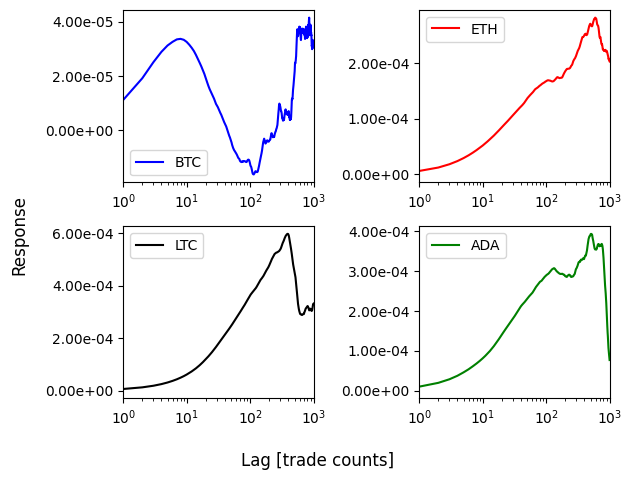

In [2]:
plot.plot_response_plot()

## C. Transfer Entropy from keywords to crypto logreturns.

In [2]:
#Load data
df = pd.read_parquet("data/clean/googleTrends_btc_ada_eth_ltc")
#Matching index column to name column
idx2name = {id : name for id, name in enumerate(df.columns)}

### Bivariate transfer entropy (bTE)

In [7]:
#Infer graph 
max_lag_sources = 24
min_lag_sources = 4 
thau = 4
targets_idx = [0, 1, 2, 3]
name_file = "test"

#Infer graph (takes time)
#te.infer_graph_bTE(max_lag_sources, min_lag_sources, thau, df, targets_idx, name_file)

#Load results 
path_res = "data/clean/transfer_entropy/results2.p"
results = te.load_results(path_res)

#Retrieve inference results 
res_ind = te.individual_results_all(targets_idx, results, idx2name)
res_joint = te.joint_results(results, idx2name)

res_ind

Info delay        TE  P-value
Target      Source                                 
BTC_Logrets Bitcoin            4  0.026025    0.002
            btc               22  0.022892    0.002
            ETH               16  0.020502    0.008
            FED               22  0.022693    0.002
            Musk               4  0.027561    0.002
            trading            4  0.018701    0.010
ADA_Logrets Bitcoin           22  0.014723    0.042
            btc                4  0.016985    0.014
            Litecoin           4  0.014048    0.028
ETH_Logrets Bitcoin            4  0.018514    0.004
            btc                4  0.023103    0.002
            Musk              16  0.024241    0.002
            crypto            22  0.014518    0.028
            Binance           22  0.022398    0.004
            Litecoin           4  0.015516    0.028
LTC_Logrets Bitcoin           10  0.025258    0.002
            btc                4  0.030508    0.002
            Ethereum          10  0.012931    0.002
            Ethereum          16  0.013359    0.038
            trading           22  0.022304    0.004
            Litecoin           4  0.025917    0.002

In [4]:
res_joint

(        Target  Joint TE  P-value joint
 0  BTC_Logrets  0.033986          0.005
 1  ADA_Logrets  0.009905          0.020
 2  ETH_Logrets  0.025884          0.005
 3  LTC_Logrets  0.026076          0.005,)

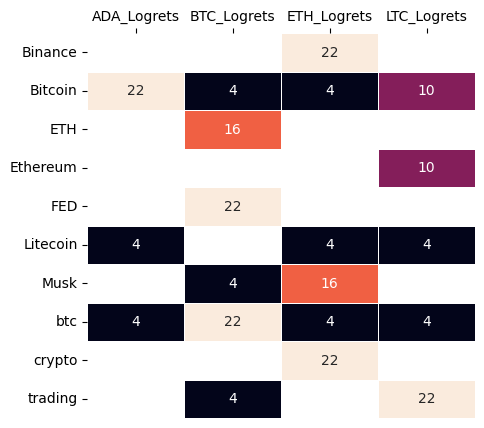

In [40]:
#Display heatmap of information delay 
te.information_delay(res_ind, "info_delay_bTE2")

## D. Lead-Lag Networks

(484,)


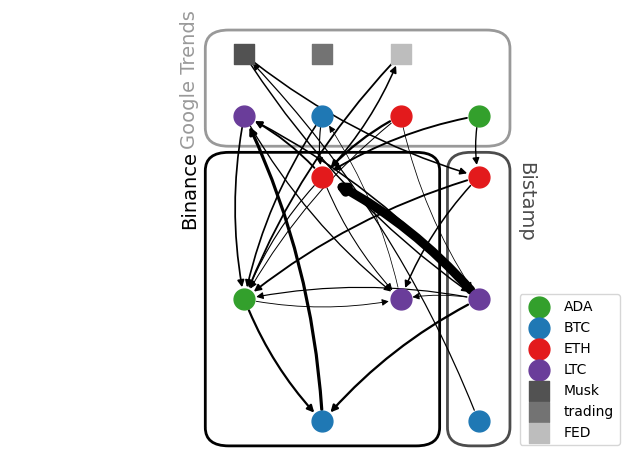

In [2]:
llr_df, minimum_statistically_significant_llr = llr.fetch_lead_lag_ratios()
adj_matrix, test, row_order, node_degrees = llr.llr_plot(llr_df, "2021-01-01",threshold = minimum_statistically_significant_llr)

 HALF CLUSTER  Lc.new > max(Lc.old)
 HALF CLUSTER  Lc.new > max(Lc.old)
 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting


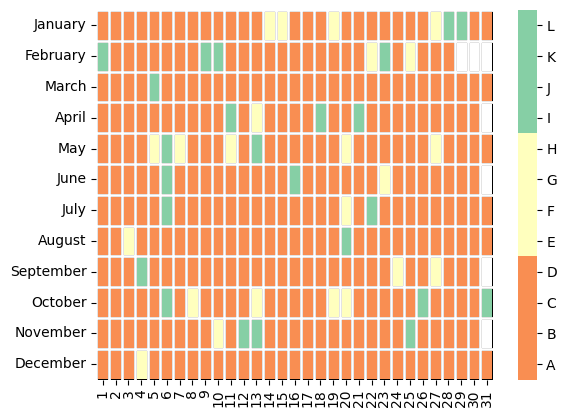

In [3]:
llr.plot_giada_marsili_clustering(RMT_corrected=False)